# SPY

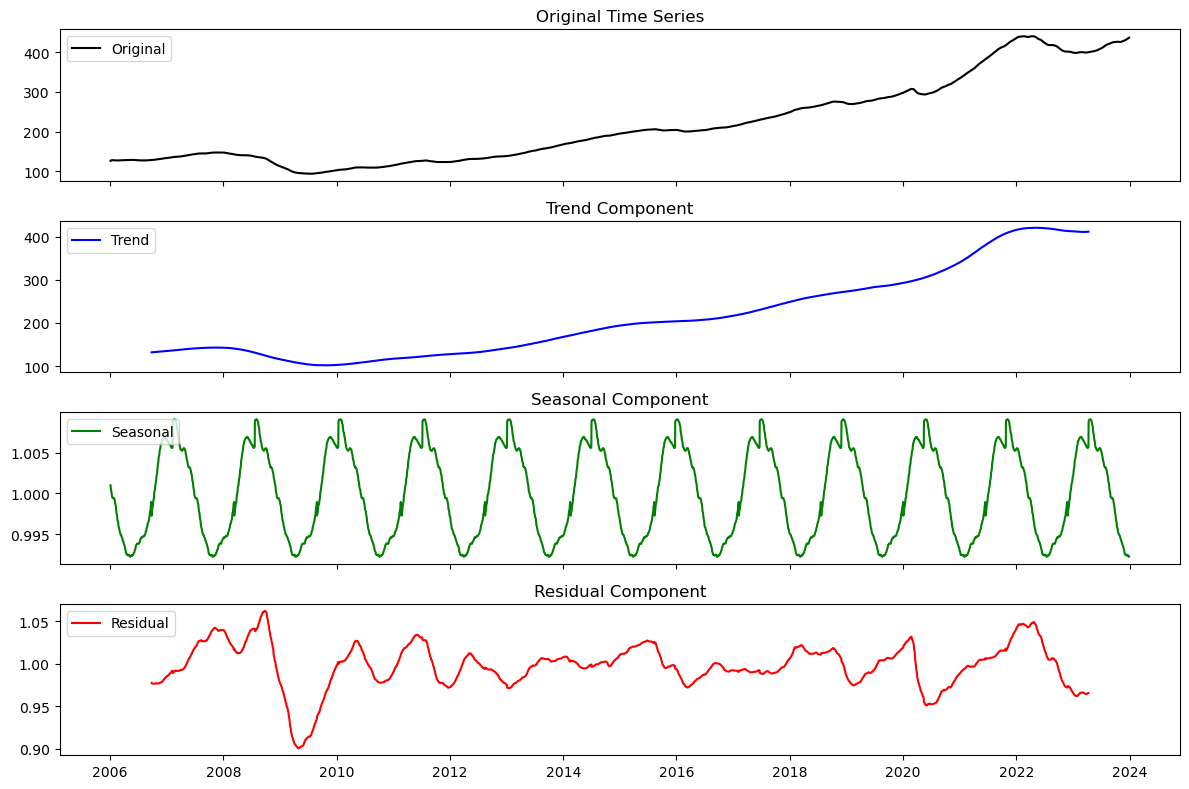

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 불러오기
df = pd.read_csv('./Kalman_filtered_data/SPY ETF Stock Price History.csv', parse_dates=['Date'], index_col='Date')

# # Price 칼럼 확인
# df = df[['Price']].dropna()  # 결측치 제거

# 시계열 분해 수행 (모델 선택: additive 또는 multiplicative)
decomposition = seasonal_decompose(df['Price'], model='additive', period=365)

# 분해된 요소 추출
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 그래프 출력
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df['Price'], label='Original', color='black')
axes[0].legend(loc='upper left')
axes[0].set_title('Original Time Series')

axes[1].plot(trend, label='Trend', color='blue')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend Component')

axes[2].plot(seasonal, label='Seasonal', color='green')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal Component')

axes[3].plot(residual, label='Residual', color='red')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual Component')

plt.tight_layout()
plt.show()


In [ ]:
#print(df['Price'])
# print("trend")
#print(trend[170:190])
# print("seasonal")
# print(seasonal[:30])
# print("residual")
# print(residual)
#print(decomposition.observed)

Date
2006-01-03    126.700000
2006-01-04    127.245455
2006-01-05    127.309528
2006-01-06    127.674262
2006-01-09    127.941615
                 ...    
2023-12-22    434.724210
2023-12-26    435.131427
2023-12-27    435.543149
2023-12-28    435.952565
2023-12-29    436.344177
Name: Price, Length: 4471, dtype: float64


# GOLD

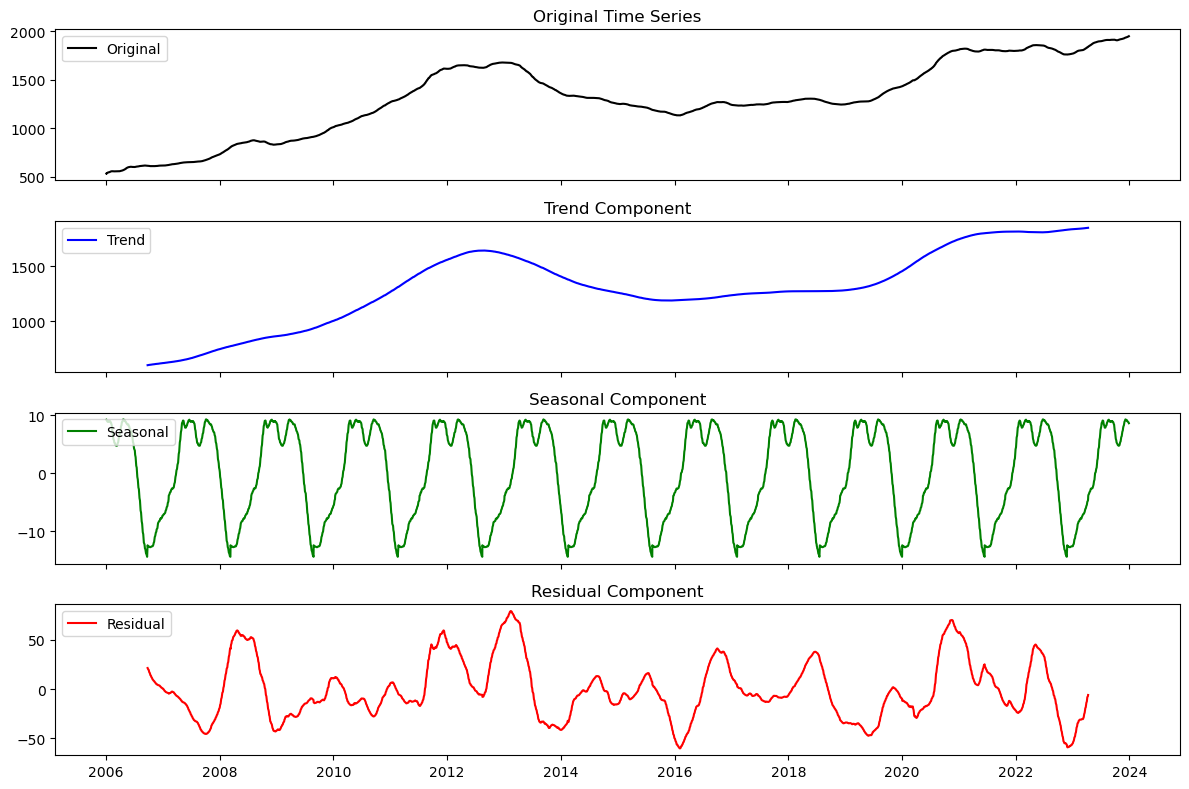

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 불러오기
df = pd.read_csv('./Kalman_filtered_data/Gold Futures Historical Data.csv', parse_dates=['Date'], index_col='Date')

# # Price 칼럼 확인
# df = df[['Price']].dropna()  # 결측치 제거

# 시계열 분해 수행 (모델 선택: additive 또는 multiplicative)
decomposition = seasonal_decompose(df['Price'], model='additive', period=365)

# 분해된 요소 추출
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 그래프 출력
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df['Price'], label='Original', color='black')
axes[0].legend(loc='upper left')
axes[0].set_title('Original Time Series')

axes[1].plot(trend, label='Trend', color='blue')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend Component')

axes[2].plot(seasonal, label='Seasonal', color='green')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal Component')

axes[3].plot(residual, label='Residual', color='red')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual Component')

plt.tight_layout()
plt.show()


1. 승법 모델을 사용하여 다시 분해

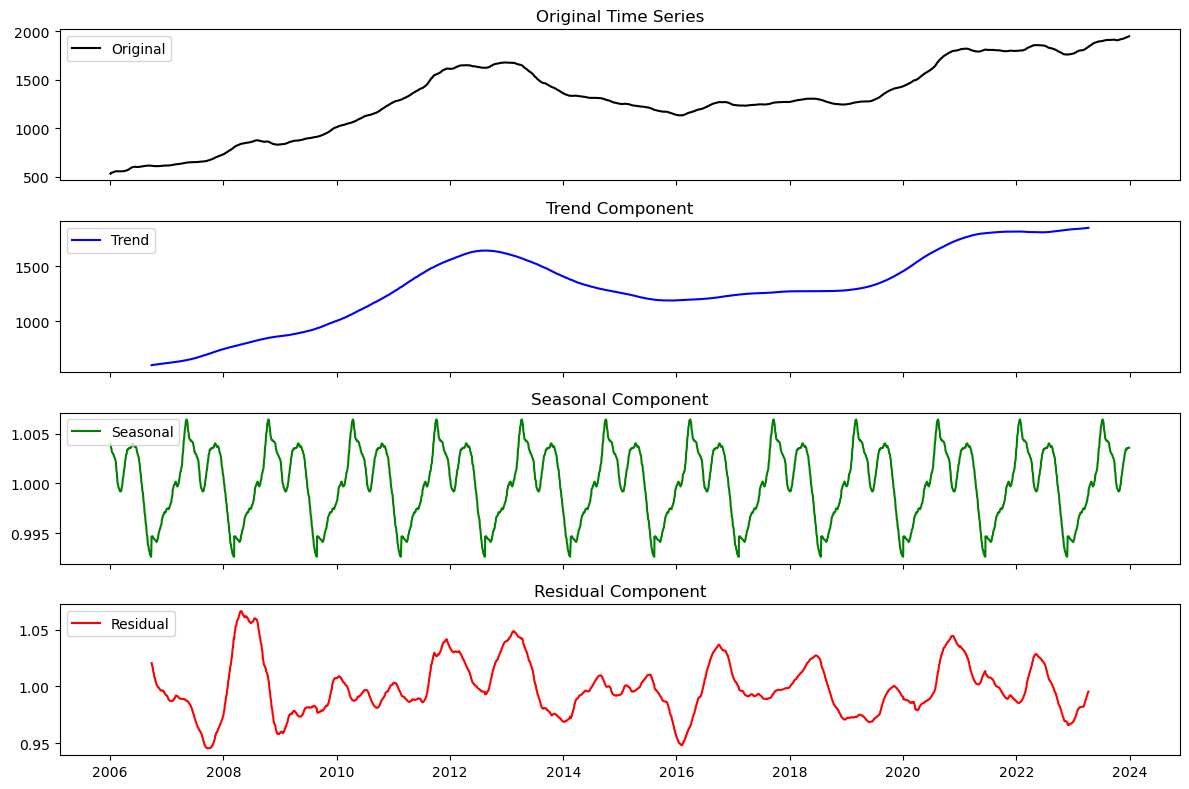

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 불러오기
df = pd.read_csv('./Kalman_filtered_data/Gold Futures Historical Data.csv', parse_dates=['Date'], index_col='Date')

# # Price 칼럼 확인
# df = df[['Price']].dropna()  # 결측치 제거

# 시계열 분해 수행 (모델 선택: additive 또는 multiplicative)
decomposition = seasonal_decompose(df['Price'], model='multiplicative', period=365)

# 분해된 요소 추출
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 그래프 출력
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df['Price'], label='Original', color='black')
axes[0].legend(loc='upper left')
axes[0].set_title('Original Time Series')

axes[1].plot(trend, label='Trend', color='blue')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend Component')

axes[2].plot(seasonal, label='Seasonal', color='green')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal Component')

axes[3].plot(residual, label='Residual', color='red')
axes[3].legend(loc='upper left')
axes[3].set_title('Residual Component')

plt.tight_layout()
plt.show()


2. ACF/PACF 분석 수행

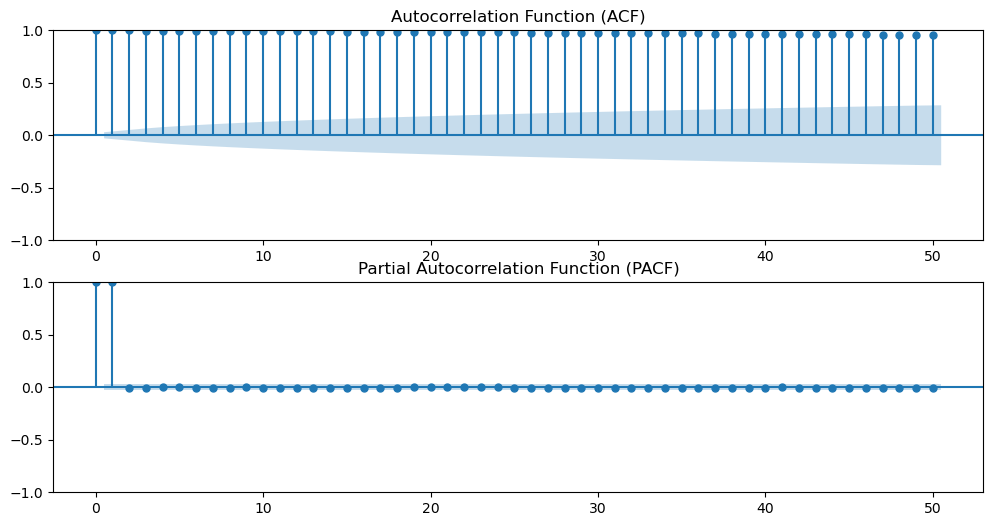

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df['Price'].dropna(), lags=50, ax=ax[0])
ax[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(df['Price'].dropna(), lags=50, ax=ax[1])
ax[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()


3. FFT를 이용한 주기 분석

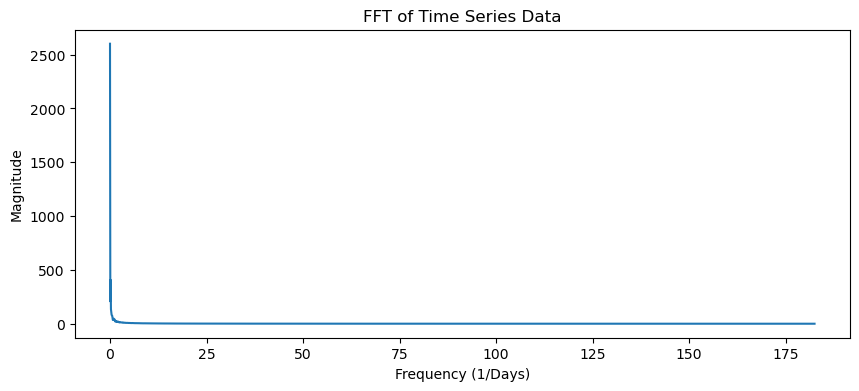

In [9]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# 결측치 제거 후 NumPy 배열로 변환
price_data = df['Price'].dropna().to_numpy()  # NumPy 배열로 변환

# Fourier Transform 수행
n = len(price_data)
yf = fft(price_data)
xf = np.linspace(0.0, 1.0 / (2.0 * (1 / 365)), n // 2)  # 365일 단위 변환

# 주파수 성분 시각화
plt.figure(figsize=(10, 4))
plt.plot(xf, 2.0 / n * np.abs(yf[:n // 2]))
plt.title("FFT of Time Series Data")
plt.xlabel("Frequency (1/Days)")
plt.ylabel("Magnitude")
plt.show()
